# Notebook 2  Jafuno Douba
## Exercice 1

Importation des données

In [1]:
cath <- read.table('cathedral.txt', header = TRUE)

Nuage de points

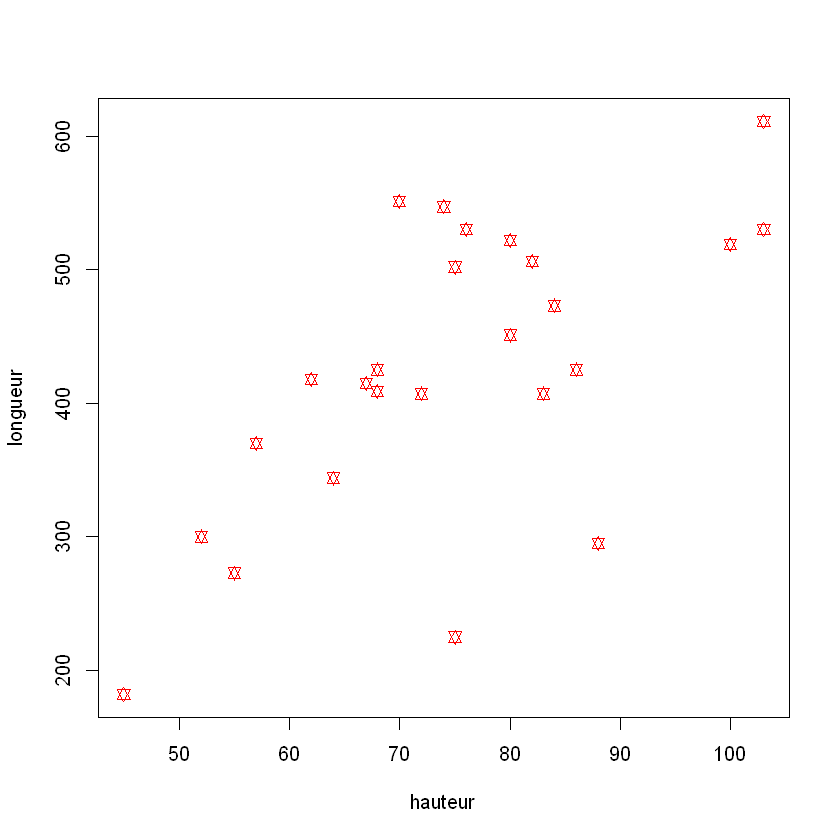

In [2]:
plot(cath$haut, cath$long, col = 'red', xlab = 'hauteur', ylab = 'longueur', pch = 11)

### Exercice 2

Nuage de points avec différentes couleurs pour les différents styles et ajout de la droite de régression

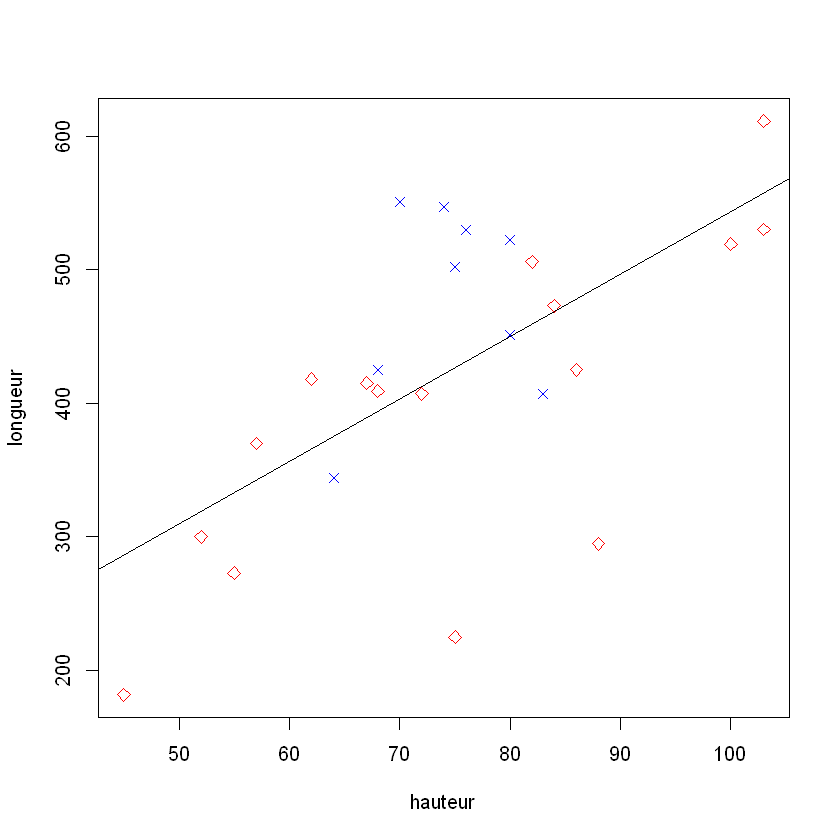

In [3]:
plot(cath[cath$style == 'goth', ]$haut, cath[cath$style == 'goth', ]$long ,col='red',xlab='hauteur',ylab='longueur',pch=5)
points(cath[cath$style == 'rom', ]$haut, cath[cath$style == 'rom', ]$long ,col='blue',pch=4)
legend(15,180,c('gothique','romane'),col=c('red','blue'),pch=c(5,4))

b <- cov(cath$long, cath$haut)/var(cath$haut)
a <- mean(cath$long) - mean(cath$haut)*b
abline(a,b)

## Exercice 3

Histogramme de la variable hauteur de cathédrale.

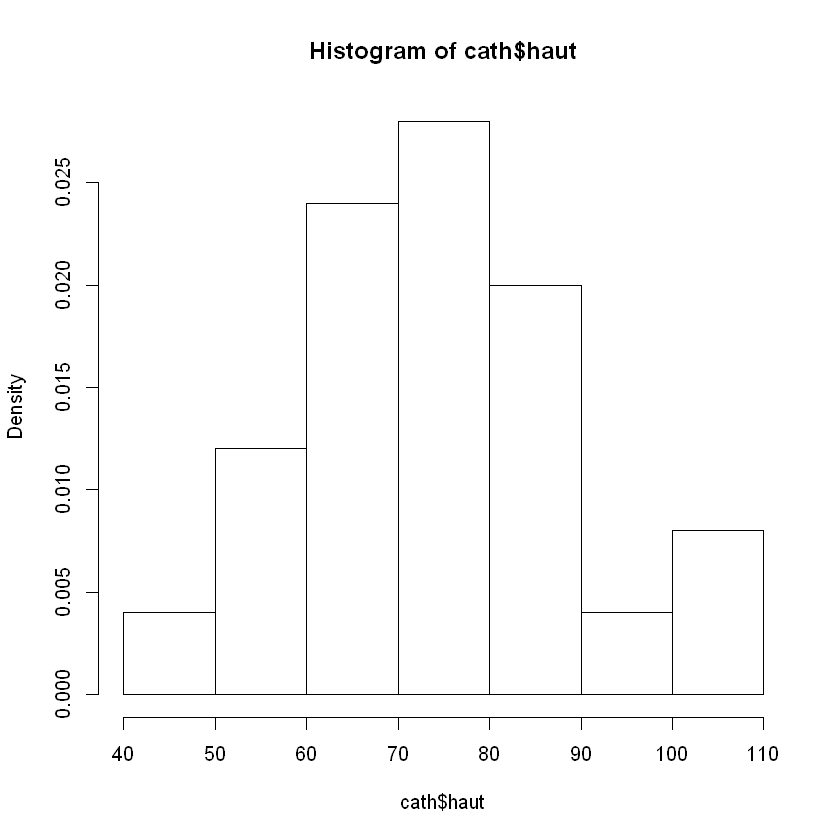

In [4]:
hist(cath$haut, freq = F)

Modification du nombre de sous-intervalles utilisé pour construire l'histogramme. 
Test des différentes tailles de partition.


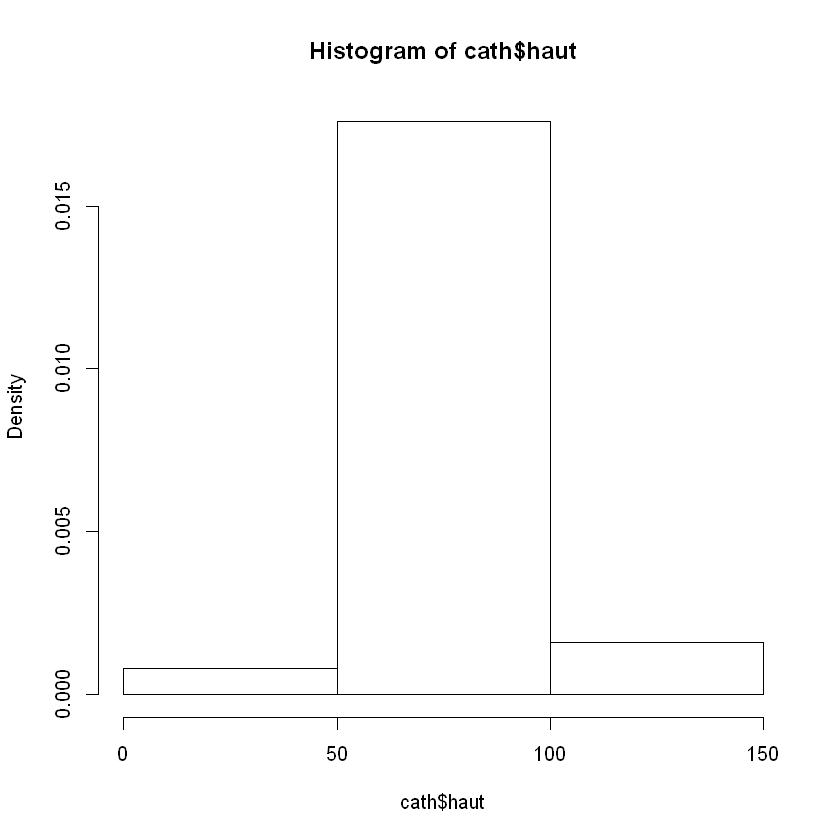

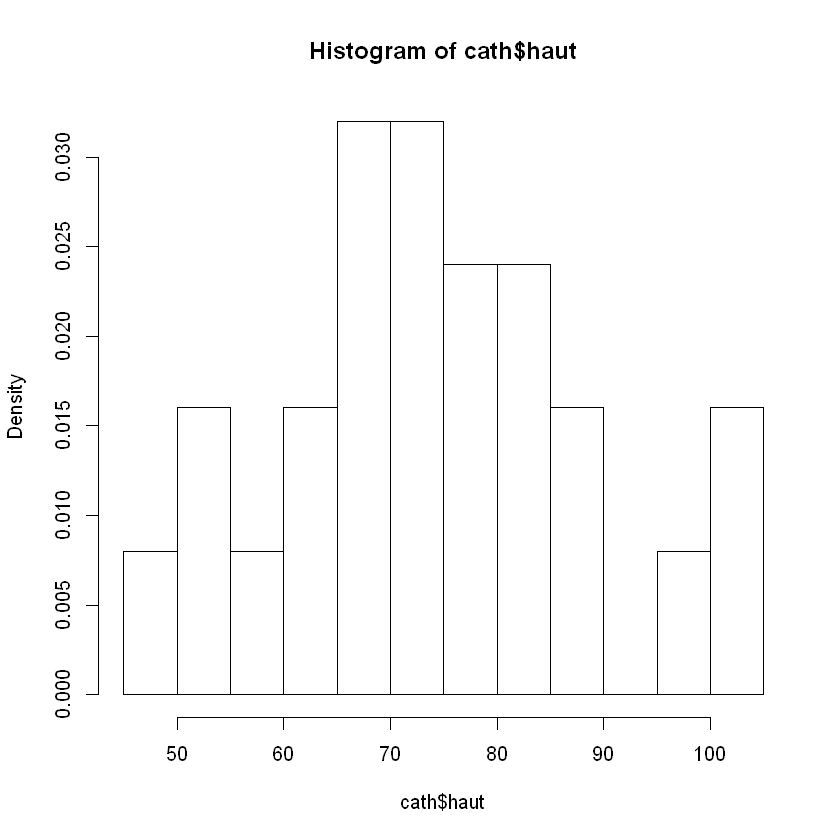

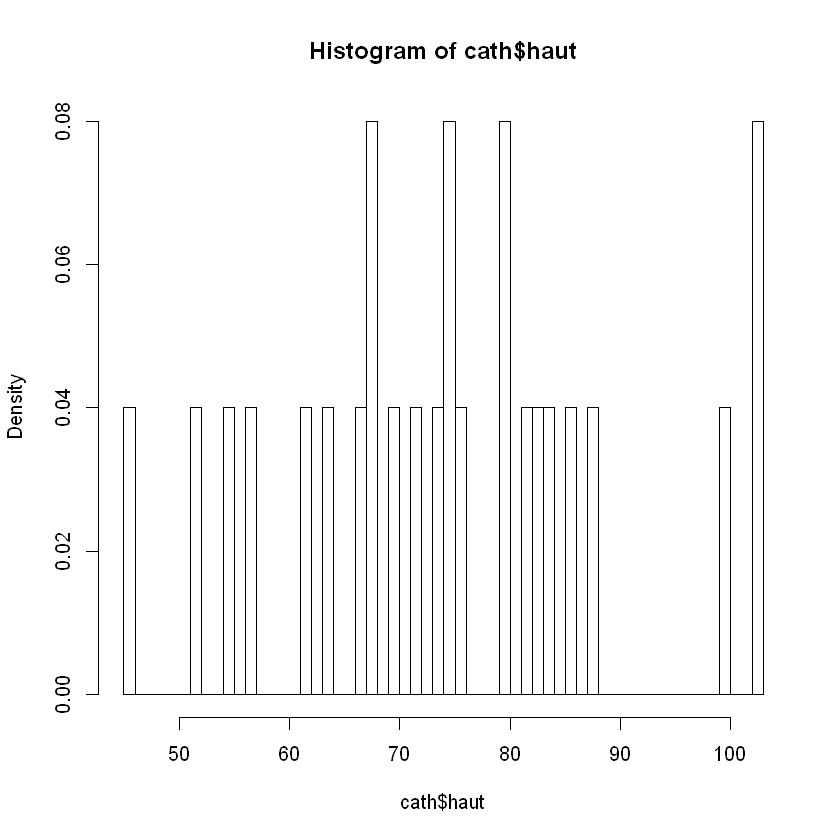

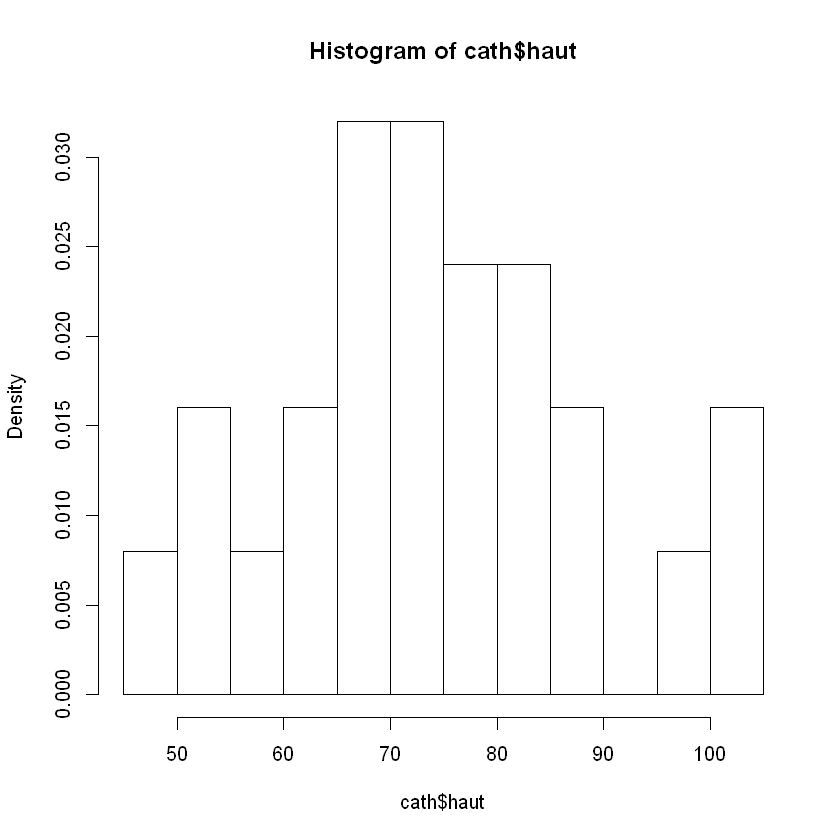

In [5]:
hist(cath$haut, freq = F, breaks = 2)
hist(cath$haut, freq = F, breaks=10)
hist(cath$haut, freq = F, breaks = 15)
hist(cath$haut,freq = F, breaks = 50)
hist(cath$haut, freq = F, breaks = 10)

Le bon nombre de sous-intervalles pour l'histogramme dépend du nombre d'observations ainsi que de la densité sous-jacente.
Il faut trouver un compromis entre pas assez de précision (trop peu de sous-intervalles) et une représentation trop détaillée (plusieurs intervalles qui ne contiennent qu'une voir aucune observation)

Avec des largeurs différentes

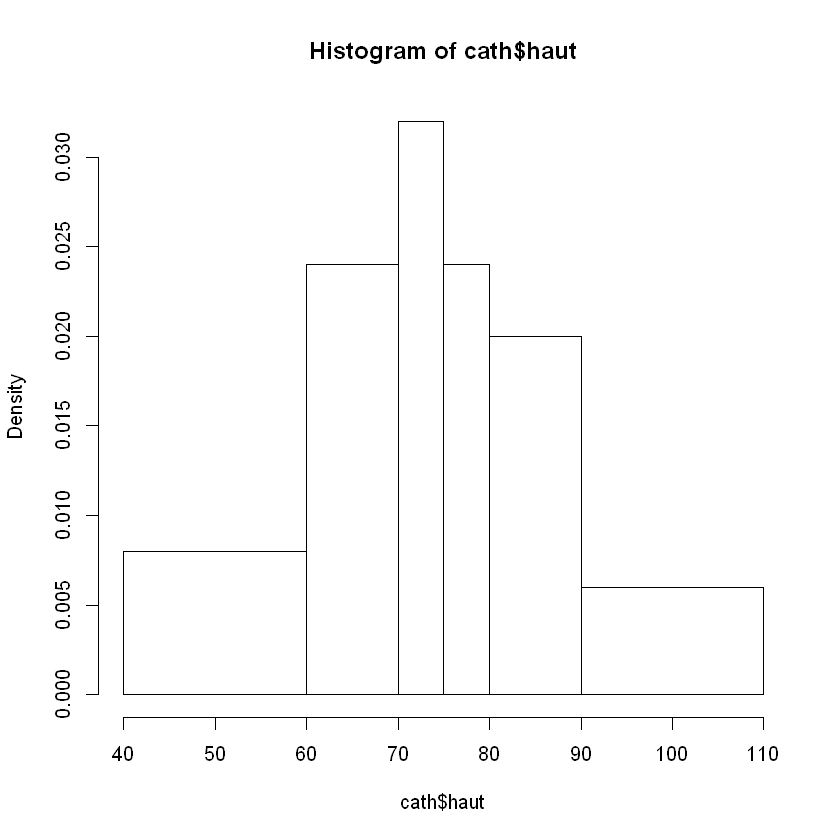

In [6]:
hist(cath$haut, freq = F, breaks = c(40,  60,  70, 75, 80, 90, 110))

Histogramme de la variable longueur.

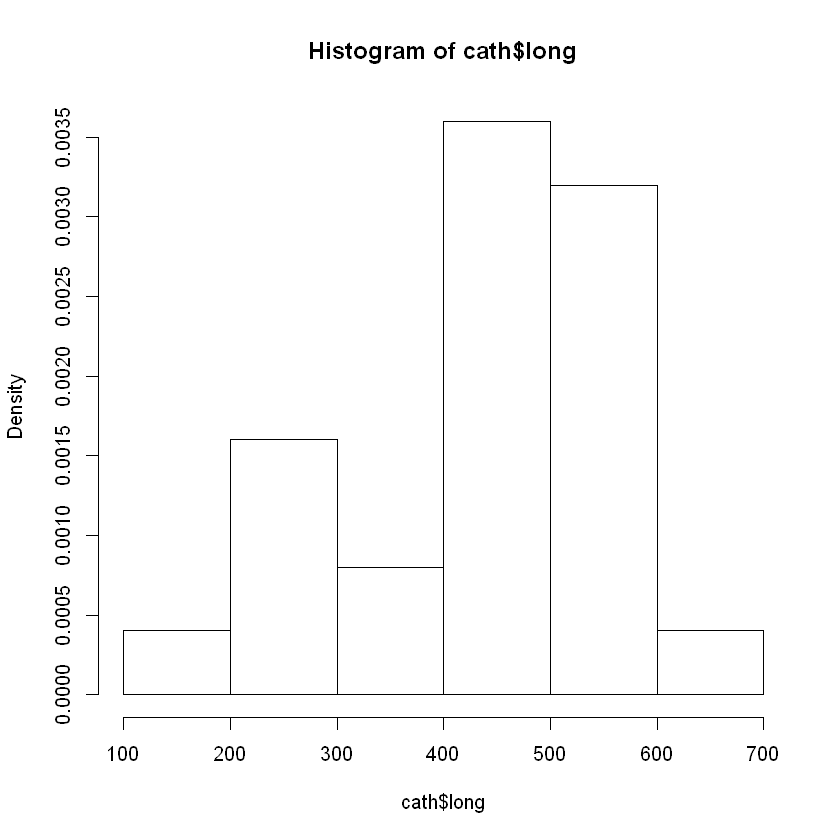

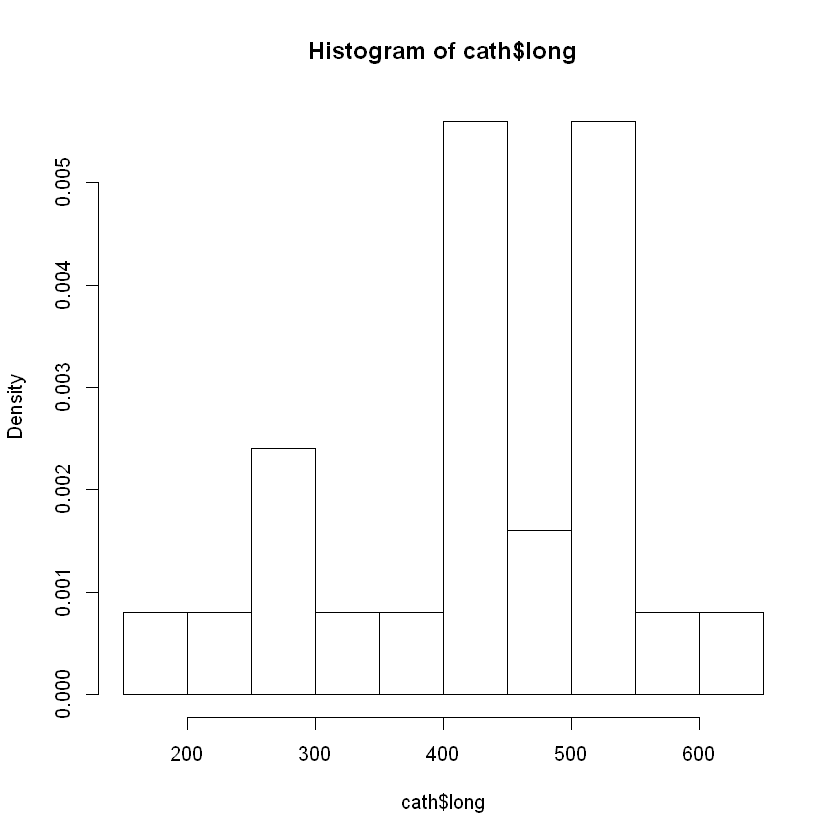

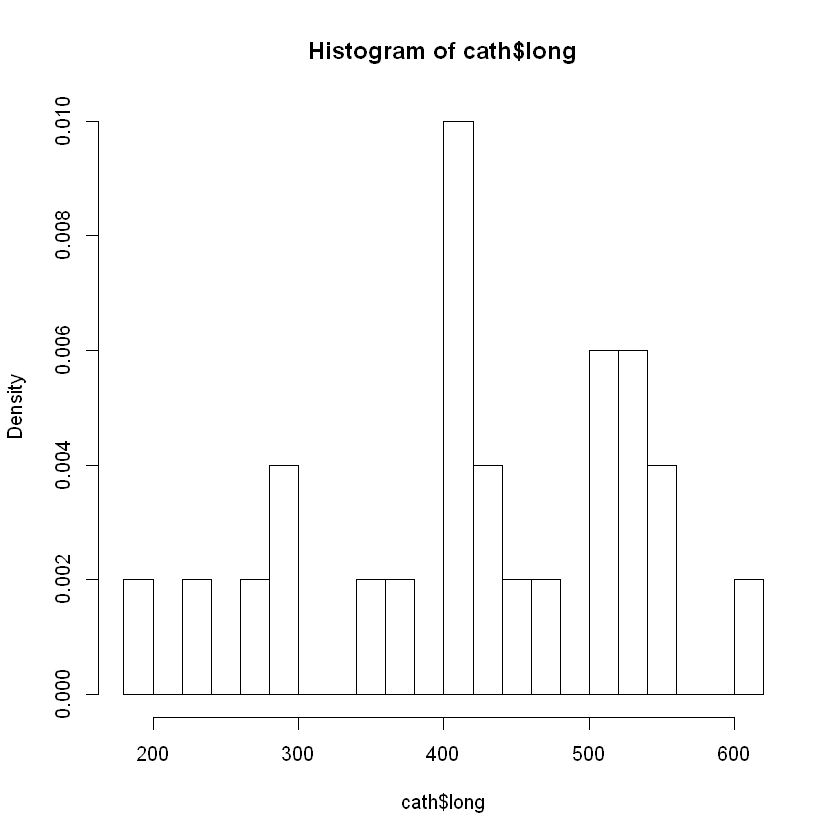

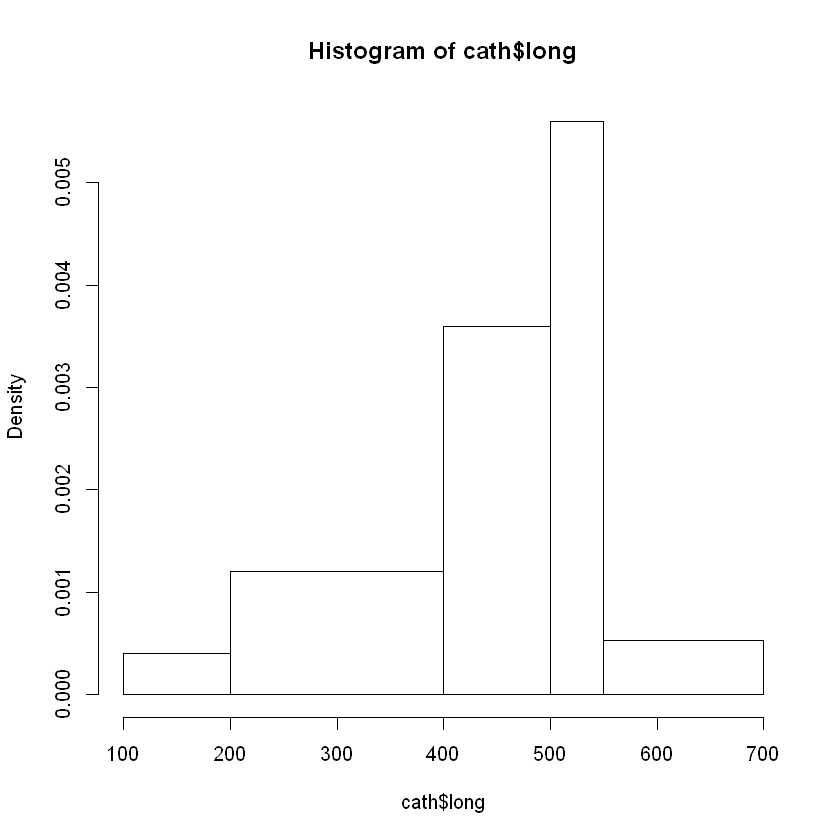

In [7]:
hist(cath$long, freq = F)
hist(cath$long, freq = F, breaks = 5)
hist(cath$long, freq = F, breaks = 10)
hist(cath$long, freq = F, breaks = 20)
hist(cath$long, freq = F, breaks = c(100, 200, 400, 500, 550, 700))

Souvent le choix par défaut de la fonction hist pour la taille de la partition n'est pas si mauvais.


Ajout de la densité d'une loi normale.

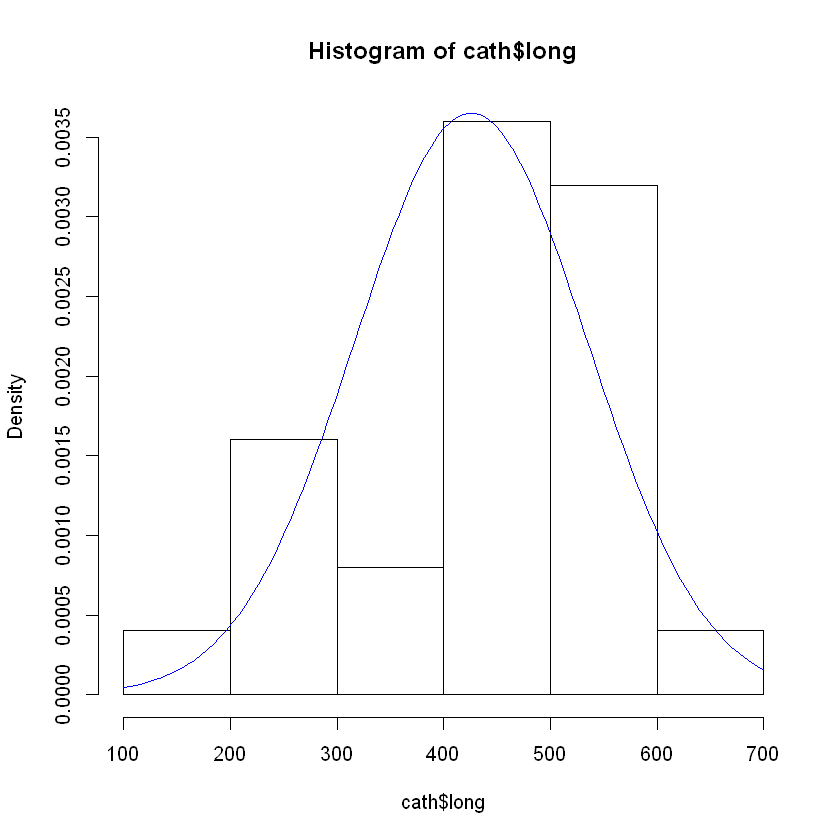

In [8]:
hist(cath$long, freq = F, breaks = 5)
curve(dnorm(x, mean(cath$long), sd(cath$long)), add = T, col='blue')

L'histogramme est (à peu près) unimodal et légèrement asymétrique. 
Etant donné que la taille de l'échantillon est petite, la densité gaussienne semble appropriée (en tout cas on ne peut pas rejeter l'hypothèse gaussienne avec certitude.)


## Exercice 4

Fonction de répartion empirique de la hauteur avec la fonction de répartition de la loi normale de paramètre $\mu=$ moyenne empirique de la hauteur et $\sigma^2=$ variance empirique de la hauteur en utilisant la fonction **pnorm**. 

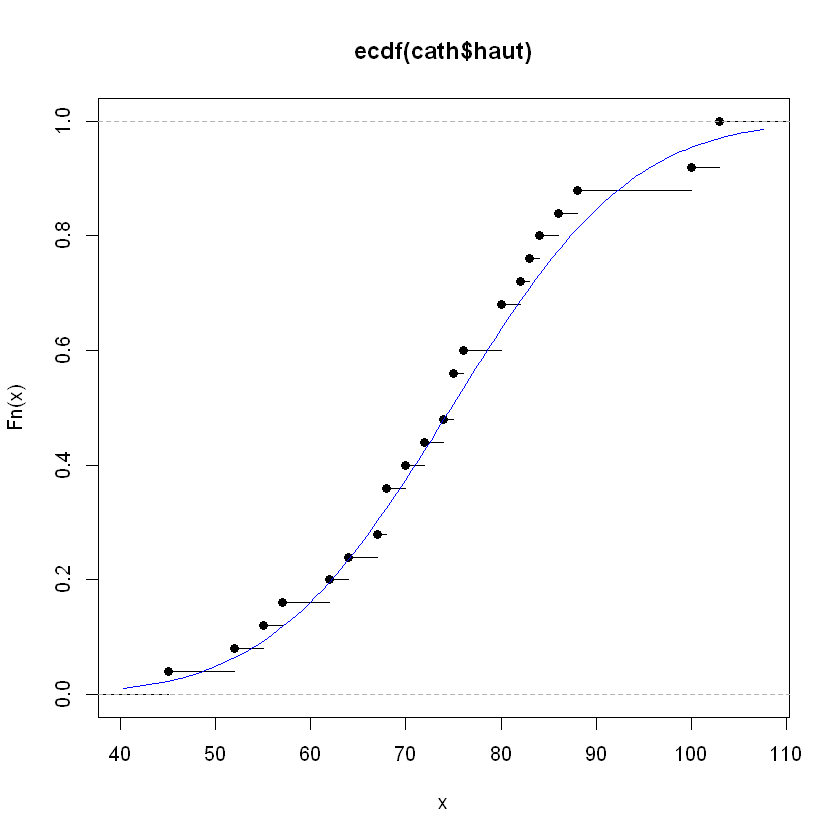

In [9]:
plot(ecdf(cath$haut))
curve(pnorm(x, mean(cath$haut), sd(cath$haut)), add = T, col ='blue')

L'adéquation entre la fonction de répartition empirique et la fonction de répartition théorique est très bonne.

## Exercice 5
Comparaison des lois de la hauteur et de la longueur des cathédrales par un QQ-plot.


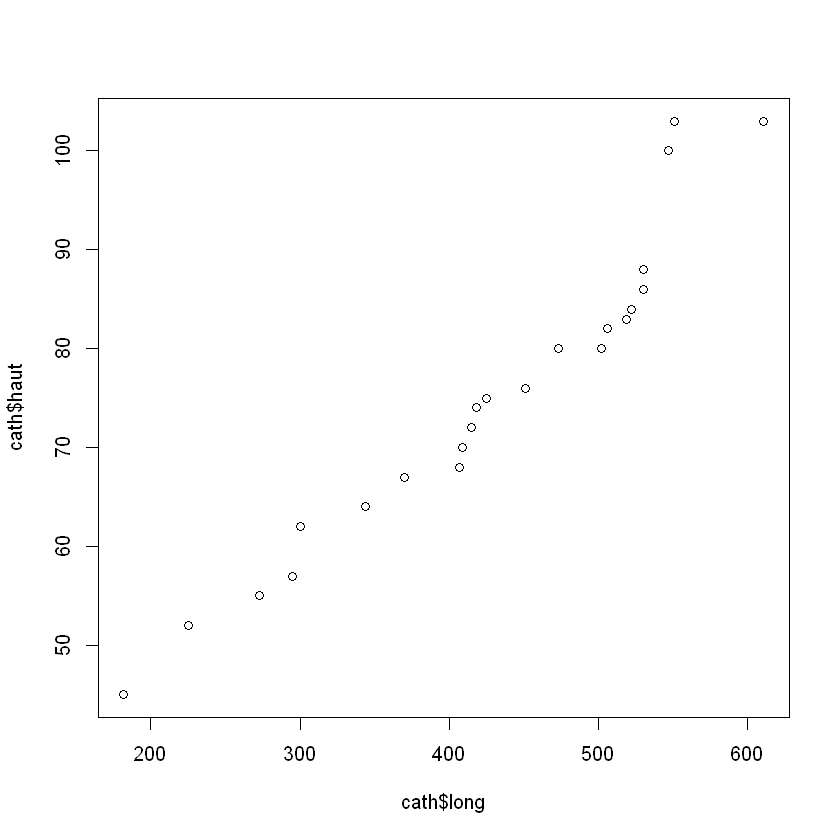

In [10]:
qqplot(cath$long, cath$haut)

Les points s'alignent (à peu près) sur une droite. Pour mieux voir, on standardise les données pour pouvoir comparer à la première bissectrice

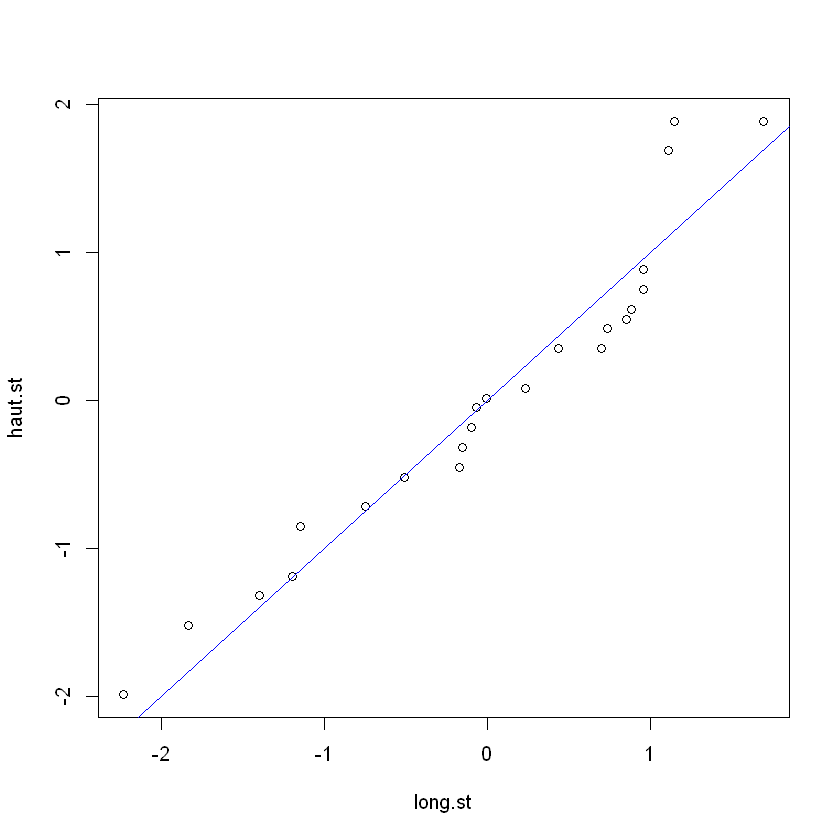

In [11]:
long.st <- (cath$long - mean(cath$long))/sd(cath$long)
haut.st <- (cath$haut - mean(cath$haut))/sd(cath$haut)
qqplot(long.st,haut.st)
abline(0, 1, col='blue')

Comparaison des distributions des variables hauteur et longueur à une loi normale.




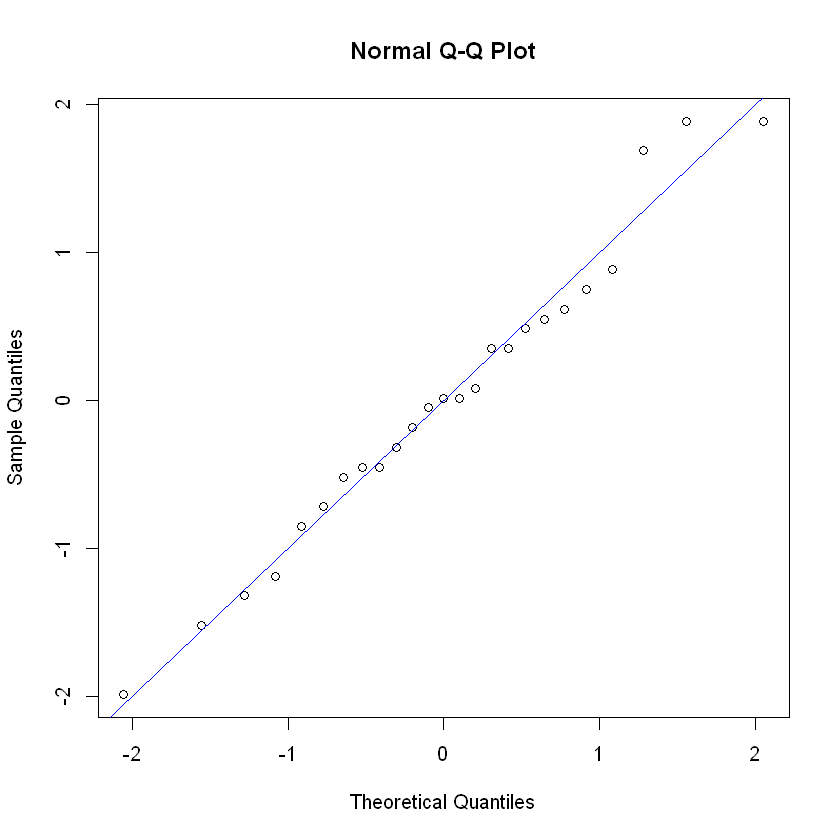

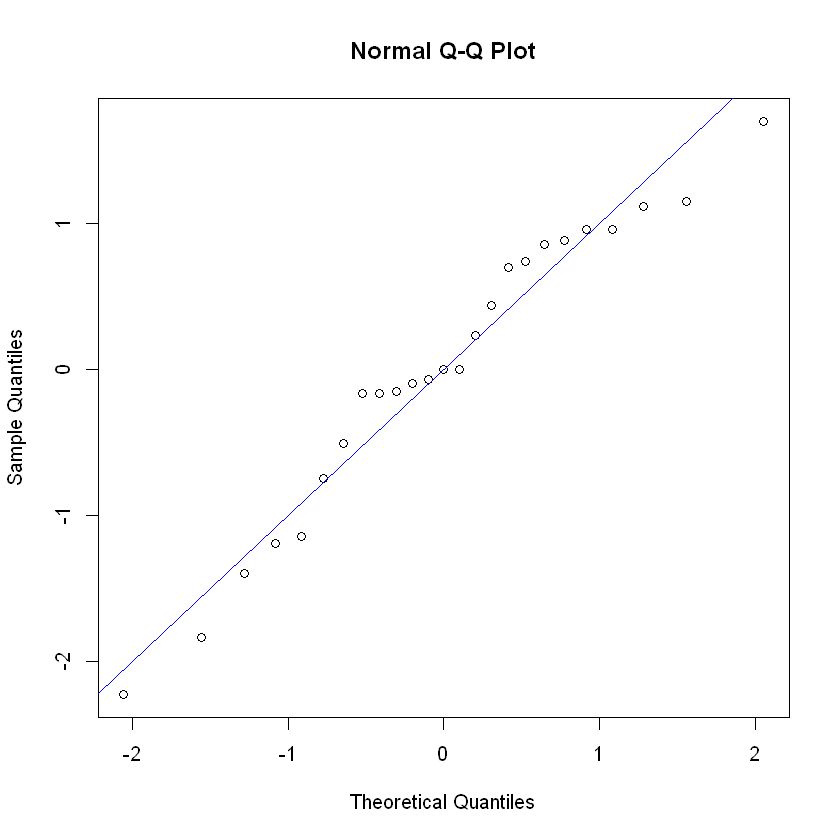

In [12]:
qqnorm(haut.st)
abline(0,1, col = 'blue')

qqnorm(long.st)
abline(0,1, col = 'blue')

La hauteur semble suivre une loi normale. Pour la longueur, les points s'écartent un peu plus de la première bissectrice, mais pas au point qu'on pourrait rejeter l'hypothèse gaussienne.

 ## Exercice 6

Boxplots des variables hauteur, longueur  et rapport longueur/hauteur dans une seule fenêtre



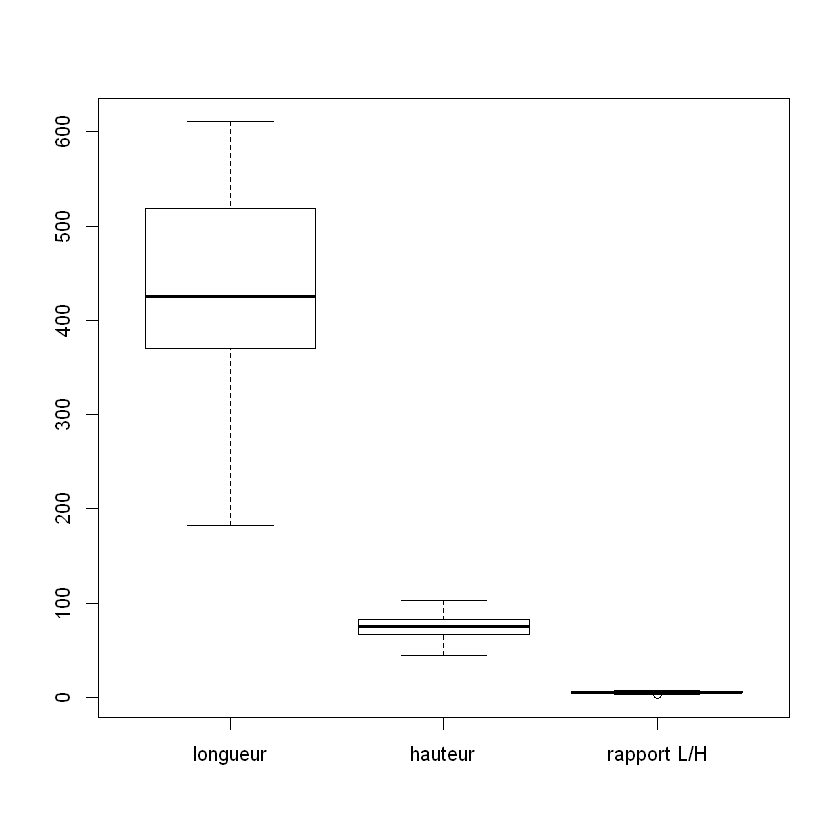

In [13]:
cath$rapport <- cath$long/cath$haut
boxplot(cath$long, cath$haut, cath$rapport, names = c('longueur','hauteur','rapport L/H'))

 On voit que les trois variables ont des ordres de grandeurs assez différentes. Les trois boxplots sont symétriques. Seulement la variable rapport L/H contient une observation aberrante.

Boxplot de la longueur en fonction du style

[1] "factor"

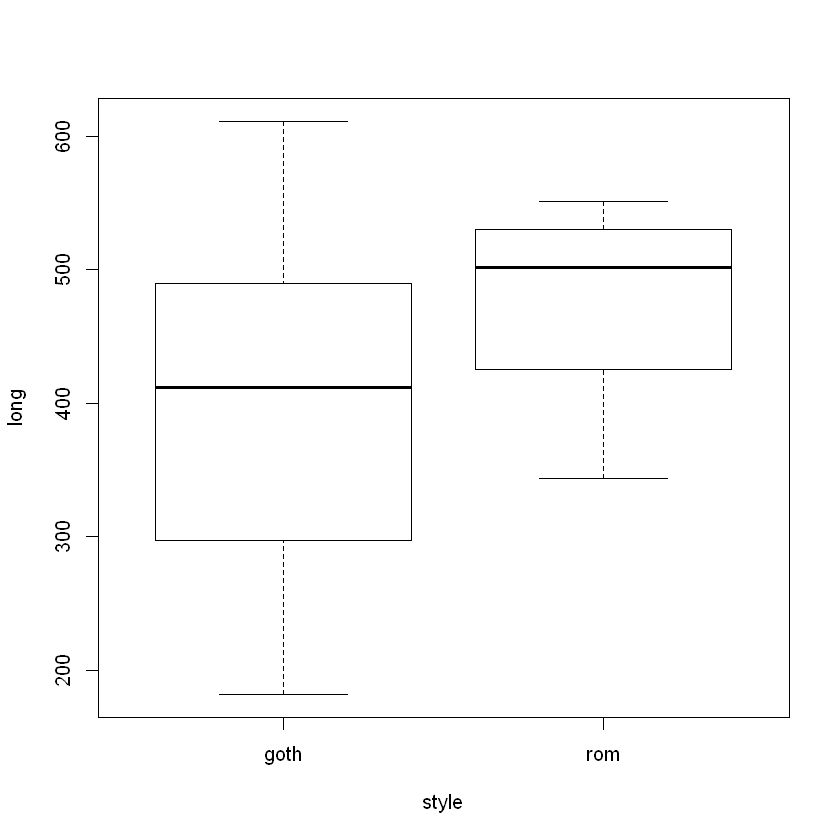

In [14]:
class(cath$style)
boxplot(long~style, data = cath)

Beaucoup plus de variabilité de la longueur des cathédrales gothiques que  des cathédrales romanes

Boxplot de la hauteur en fonction du style


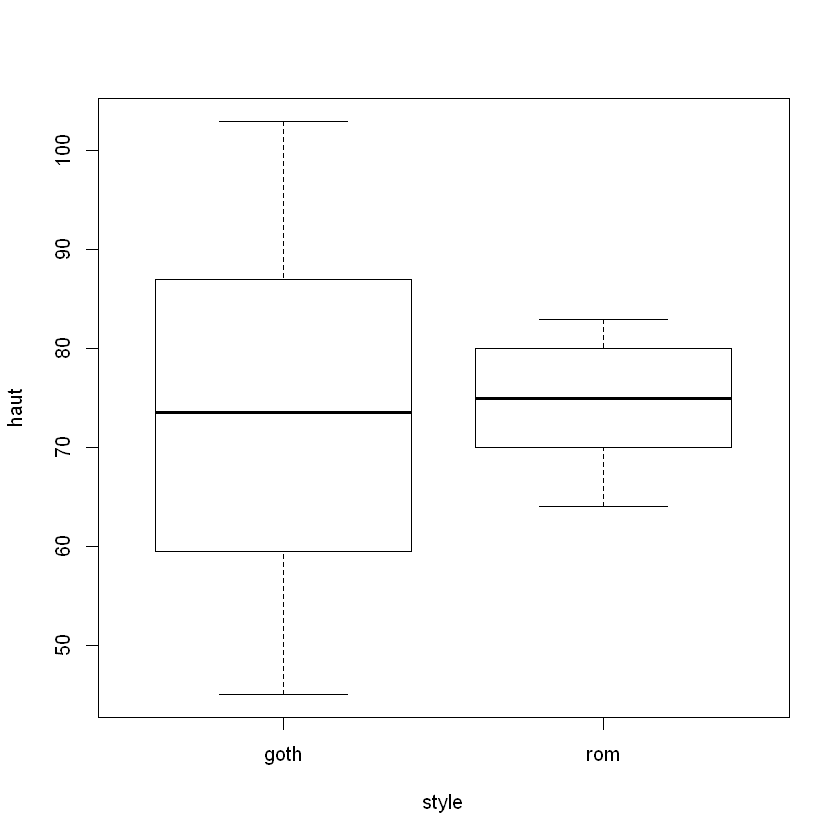

In [15]:
boxplot(haut~style, data = cath)

Les deux boxplots bien symétriques, ils ont les mêmes médianes, mais beaucoup plus de variabilité de la hauteur des cathédrales gothiques que des cathédrales romanes

Boxplot du rapport en fonction du style


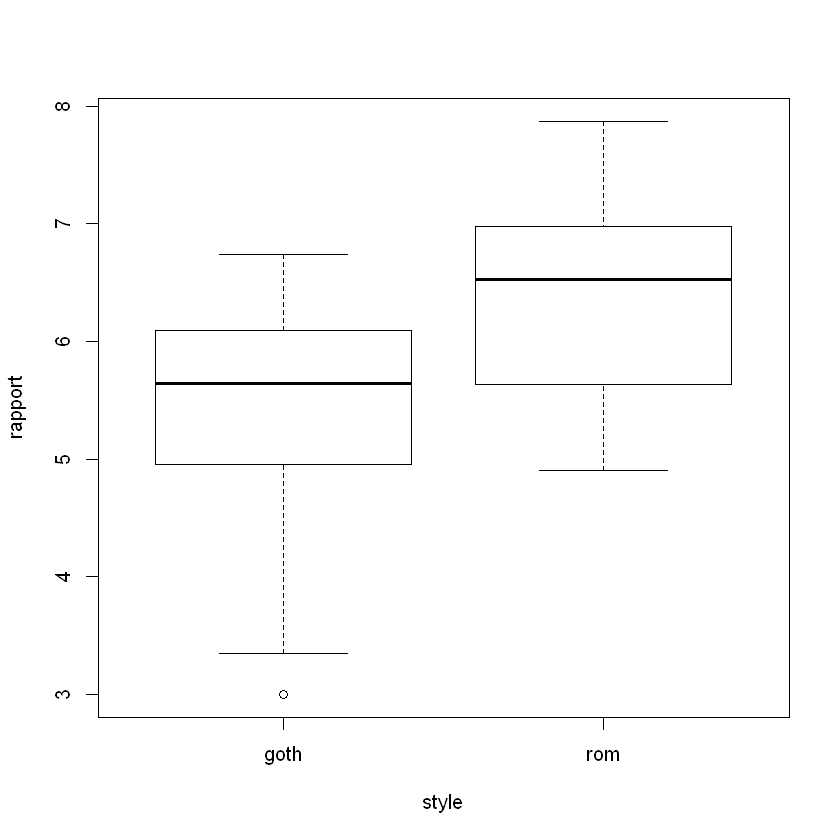

In [16]:
boxplot(rapport~style, data = cath)

Les 2 boxplots ont la même forme, mais pour les cathédrales romanes il est décalé vers le haut.